Version 1.0.2

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
transactions.shape

(2935849, 6)

In [5]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [6]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%d.%m.%Y')
transactions['total_revenue'] = transactions['item_price']*transactions['item_cnt_day']

In [7]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 7 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
total_revenue     float64
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 156.8 MB


In [8]:
tr_1409 = transactions[(transactions['date'].dt.year == 2014)&(transactions['date'].dt.month == 9)]
tr_1409 = tr_1409.groupby('shop_id', as_index = False)['total_revenue'].sum()
tr_1409['total_revenue'].max()

7982852.1999999564

In [9]:
max_revenue = tr_1409['total_revenue'].max()
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [10]:
transactions = pd.merge(transactions, items, on = 'item_id', how = 'inner')

In [11]:
transactions = pd.merge(transactions, item_categories, on = 'item_category_id', how = 'inner')

In [12]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_revenue,item_name,item_category_id,item_category_name
0,2013-01-02,0,59,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-23,0,24,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-01-20,0,27,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-01-02,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-01-03,0,25,22154,999.0,1.0,999.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [13]:
summer = transactions[(transactions['date'].dt.month < 9) & (transactions['date'].dt.month > 5) & (transactions['date'].dt.year == 2014)]
summer_c = summer.groupby('item_category_id', as_index = False)['total_revenue'].sum()
summer_c[summer_c['total_revenue'] == summer_c['total_revenue']]['total_revenue'].argmax()

15

In [14]:
category_id_with_max_revenue = summer_c[summer_c['total_revenue'] == summer_c['total_revenue']]['total_revenue'].argmax()
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 15


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [15]:
s_i = transactions.groupby('item_id', as_index = False)['item_price'].agg(['min', 'max'])
s_i[s_i['min'] == s_i['max']].count()[0]

5926

In [16]:
num_items_constant_price = s_i[s_i['min'] == s_i['max']].count()[0]
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [18]:
shop_id = 25

ds = transactions[(transactions['shop_id'] == shop_id) & 
                  (transactions['date'].dt.year == 2014) & 
                  (transactions['date'].dt.month == 12)]
ds['day'] = ds['date'].dt.day
ds.sort_values('date')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,total_revenue,item_name,item_category_id,item_category_name,day
1916864,2014-12-01,23,25,12362,399.000000,1.0,399.00,КАК ПРИРУЧИТЬ ДРАКОНА 2,40,Кино - DVD,1
1026814,2014-12-01,23,25,1555,1299.000000,2.0,2598.00,Assassin's Creed: Единство. Специальное издани...,28,Игры PC - Дополнительные издания,1
699494,2014-12-01,23,25,6062,1999.000000,1.0,1999.00,Rabbids Invasion (только для MS Kinect) [Xbox ...,23,Игры - XBOX 360,1
2522842,2014-12-01,23,25,14830,279.000000,4.0,1116.00,"МТГ(РУС): Базовый Выпуск 2015: Бустер, арт.756574",65,Подарки - Настольные игры (компактные),1
2027502,2014-12-01,23,25,4138,899.000000,1.0,899.00,Kaspersky Anti-Virus 2015 Russian Edition. 2-D...,75,Программы - Для дома и офиса,1
1497124,2014-12-01,23,25,13817,149.000000,1.0,149.00,ЛЕГЕНДЫ НОЧНЫХ СТРАЖЕЙ WB (регион),40,Кино - DVD,1
699836,2014-12-01,23,25,1535,1999.000000,1.0,1999.00,Assassin's Creed. Сага о Новом Свете [Xbox 360...,23,Игры - XBOX 360,1
2379412,2014-12-01,23,25,19117,1399.000000,1.0,1399.00,СТРАЖИ ГАЛАКТИКИ (3D BD),38,Кино - Blu-Ray 3D,1
2102743,2014-12-01,23,25,992,58.000000,1.0,58.00,"3D Action Puzzle ""Динозавры"" Трицератопс",67,Подарки - Развитие,1
2298089,2014-12-01,23,25,5821,799.000000,2.0,1598.00,PlayStation Plus 3-месячная подписка: Карта оп...,35,Карты оплаты - PSN,1


In [27]:
dsg = ds.groupby(['day'], as_index = False)['item_cnt_day'].sum()

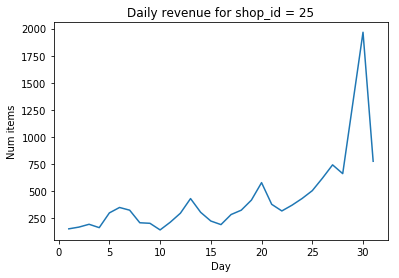

Current answer for task total_num_items_sold_var is: 117167.702299


In [28]:
shop_id = 25

total_num_items_sold = dsg.item_cnt_day
days = dsg.day

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(dsg.item_cnt_day, ddof = 1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [32]:
STUDENT_EMAIL = 'mizykk@icloud.com'
STUDENT_TOKEN = 'YL8epr6Qk4rwXa6G'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 15
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [33]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)